In [147]:
import pandas as pd

In [148]:
# reading in dataset
data = pd.read_csv("dataset/dataset.csv")
# setting date column as index
data.set_index('jdate', inplace=True)
data.drop(columns=['date'],inplace=True)

#  Data preparation

#  Missing values

In [149]:
# checking for missing values
print(data.isnull().sum())

high      0
low       0
open      0
close     0
volume    0
dtype: int64


In [150]:
# checking for duplicate rows
duplicate_rows = data.duplicated()
print(duplicate_rows.sum())

0


#  Outliers

#  Visualsing the outliers

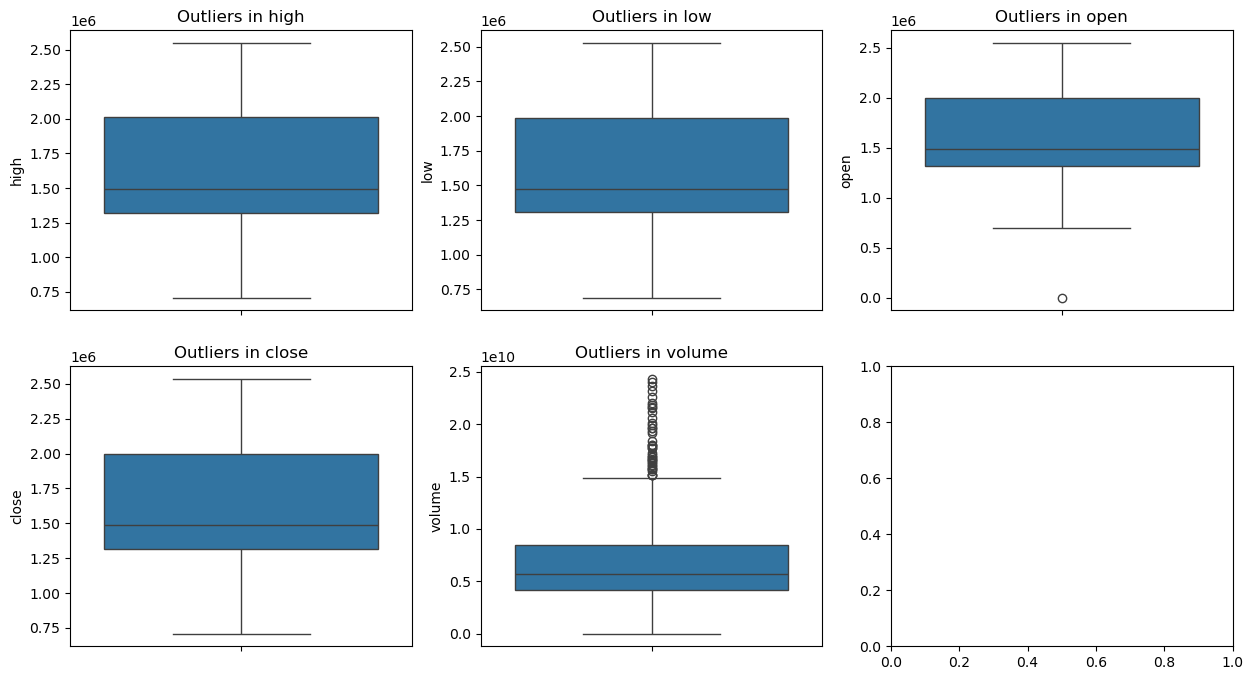

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0

# Iterating through all columns of the dataframe
for column in data.columns:
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(data[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()



#   z-score method

In [152]:
import numpy as np
from scipy import stats
# calculating the z-scores of the dataset
z_scores = np.abs(stats.zscore(data))
threshold = 3
# identifing the outliers in the dataset
outliers = np.where(z_scores > threshold)
# removing the outliers from the dataset
dataset_no_outliers = data[(z_scores < threshold).all(axis=1)]

In [153]:
data = dataset_no_outliers

I am creating a new feature in the dataset called 'daily_return'. The feature is calculated by taking the percentage change of the 'close' column. The percentage change, also known as the relative change, is a common method used to measure the change in a value over time. It is calculated by subtracting the previous value from the current value, and then dividing by the previous value. By taking the percentage change of the 'close' column, I am able to measure the daily return of the stock, which can be useful for understanding the volatility and performance of the stock over time. This feature can be useful for further analysis, such as identifying trends or patterns in the stock's performance, or for evaluating the risk and return of the stock relative to other stocks or benchmarks.

Checking that the volume of shares traded is not negative by using the .any() function to check if there are any negative values in the 'volume' column of the dataframe. 

I am normalizing the 'close' and 'volume' columns by using standardization method, which makes the values of these columns have a mean of 0 and a standard deviation of 1. This makes data more comparable and consistent, which can help improve the accuracy and reliability of my analysis.

In [154]:
# normalizing the close and volume columns
data['close'] = (data['close'] - data['close'].mean()) / data['close'].std()
data['volume'] = (data['volume'] - data['volume'].mean()) / data['volume'].std()

#  Correlation

The correlation matrix is a square matrix where the diagonal elements are always 1 (because a variable is perfectly correlated with itself) and the off-diagonal elements are between -1 and 1. Positive values indicate a positive correlation, meaning that as one variable increases, the other variable also increases. Negative values indicate a negative correlation, meaning that as one variable increases, the other variable decreases. The closer the correlation coefficient is to 1 or -1, the stronger the correlation.

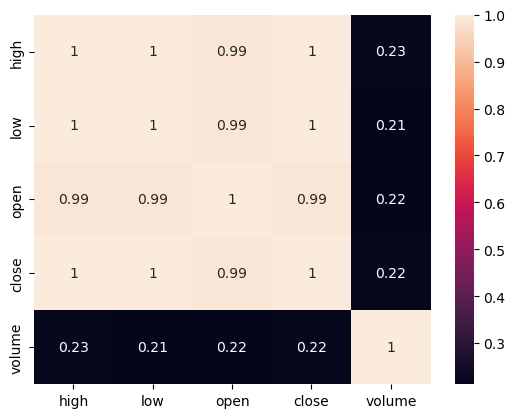

In [165]:
import seaborn as sns
corr = data_without_name.corr()
sns.heatmap(corr, annot=True)
plt.savefig('report/correlation.png')

#  Feature engineering Create additional features

'price_change': This feature calculates the difference between the closing price and the opening price for a given day, and can be used to determine the overall change in price for that day.

'returns': This feature calculates the percentage change in the closing price from one day to the next, and can be used to determine the overall change in price over time.

In [156]:
#Create a new feature 'returns'
data['returns'] = data['close'].pct_change()

'volume_change': This feature calculates the difference in trading volume from one day to the next, and can be used to determine the overall change in trading volume over time.

In [157]:
#Create a new feature 'volume_change'
data['volume_change'] = data['volume'].diff()

In [158]:
cleaned_data = data

In [159]:
# Printing a summary of the numerical columns in the cleaned dataset
cleaned_data.describe()

,high,low,open,close,volume,returns,volume_change
count,9.470000e+02,9.470000e+02,9.470000e+02,9.470000e+02,947.000000,946.000000,946.000000
mean,1.603466e+06,1.588510e+06,1.595688e+06,1.200495e-16,0.000000,-0.013789,-0.000166
std,3.689829e+05,3.675713e+05,3.685456e+05,1.000000e+00,1.000000,1.743496,0.720948
min,7.090120e+05,6.912770e+05,6.912770e+05,-2.410518e+00,-1.975545,-37.665499,-3.255568
25%,1.319300e+06,1.310705e+06,1.314305e+06,-7.688736e-01,-0.725637,-0.042530,-0.322469
50%,1.489160e+06,1.473490e+06,1.478780e+06,-3.129680e-01,-0.284870,-0.000877,-0.039482
75%,1.999440e+06,1.979035e+06,1.992305e+06,1.080254e+00,0.538220,0.034658,0.274861
max,2.383450e+06,2.352200e+06,2.383450e+06,2.100271e+00,3.475611,17.971003,3.625614


In [160]:
# Printing a summary of the columns and their data types in the cleaned dataset
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1399-02-01 to 1403-02-05
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   high           947 non-null    int64  
 1   low            947 non-null    int64  
 2   open           947 non-null    int64  
 3   close          947 non-null    float64
 4   volume         947 non-null    float64
 5   returns        946 non-null    float64
 6   volume_change  946 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 59.2+ KB
None


In [161]:
print(cleaned_data.isnull().sum())

high             0
low              0
open             0
close            0
volume           0
returns          1
volume_change    1
dtype: int64


In [162]:
cleaned_data = cleaned_data.fillna(0)

In [163]:
cleaned_data.to_csv("dataset/cleaned_dataset.csv", index=True)